In [8]:
import pandas as pd
import numpy as np

In [13]:
# Load the required datasets for abortion
df_myhh = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/myhousehold.csv")
df_125 = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/uas125.csv")
df_193 = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/uas193.csv")
df_308 = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/uas308.csv")
df_621 = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/uas621.csv")
df_645 = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/uas645.csv")

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_11671/776887979.py:4: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_193 = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/uas193.csv")
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_11671/776887979.py:5: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_308 = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/uas308.csv")


In [14]:
# Columns from myhousehold.csv
myhh_columns = ["uasid", "citizenus", "bornus", "gender", "dateofbirth_year", "race"]
basic_columns = ["uasid", "start_year", "start_month", "age", "statereside", 
                 "maritalstatus", "education", "laborstatus", "employmenttype", "hhincome", "hourswork", "hhmembernumber"]
# Add specific columns for each dataset
uas125_columns = basic_columns + ["tg_004"]
uas193_columns = basic_columns + ["ab_001"]
uas308_columns = basic_columns + ["sc_18"]
uas621_columns = basic_columns + ["cn001f", "at001f"]
uas645_columns = basic_columns + ["v003d"]

# Select relevant columns from each dataset
df_myhh = df_myhh[myhh_columns]
df_125 = df_125[uas125_columns]
df_193 = df_193[uas193_columns]
df_308 = df_308[uas308_columns]
df_621 = df_621[uas621_columns]
df_645 = df_645[uas645_columns]

# Rename columns for clarity
df_125.rename(columns={
    "start_year": "year_125",
    "start_month": "month_125",
    "age": "age_125",
    "statereside": "statereside_125",
    "maritalstatus": "maritalstatus_125",
    "education": "education_125",
    "laborstatus": "laborstatus_125",
    "employmenttype": "employmenttype_125",
    "hhincome": "hhincome_125",
    "hourswork": "hourswork_125",
    "hhmembernumber": "hhmembernumber_125",
    "tg_004": "abortion_125"
}, inplace=True)

df_193.rename(columns={
    "start_year": "year_193",
    "start_month": "month_193",
    "age": "age_193",
    "statereside": "statereside_193",
    "maritalstatus": "maritalstatus_193",
    "education": "education_193",
    "laborstatus": "laborstatus_193",
    "employmenttype": "employmenttype_193",
    "hhincome": "hhincome_193",
    "hourswork": "hourswork_193",
    "hhmembernumber": "hhmembernumber_193",
    "ab_001": "abortion_193"
}, inplace=True)


df_308.rename(columns={
    "start_year": "year_308",
    "start_month": "month_308",
    "age": "age_308",
    "statereside": "statereside_308",
    "maritalstatus": "maritalstatus_308",
    "education": "education_308",
    "laborstatus": "laborstatus_308",
    "employmenttype": "employmenttype_308",
    "hhincome": "hhincome_308",
    "hourswork": "hourswork_308",
    "hhmembernumber": "hhmembernumber_308",
    "sc_18": "abortion_308"
}, inplace=True)

df_621.rename(columns={
    "start_year": "year_621",
    "start_month": "month_621",
    "age": "age_621",
    "statereside": "statereside_621",
    "maritalstatus": "maritalstatus_621",
    "education": "education_621",
    "laborstatus": "laborstatus_621",
    "employmenttype": "employmenttype_621",
    "hhincome": "hhincome_621",
    "hourswork": "hourswork_621",
    "hhmembernumber": "hhmembernumber_621",
    "at001f": "abortion_621"
}, inplace=True)

df_645.rename(columns={
    "start_year": "year_645",
    "start_month": "month_645",
    "age": "age_645",
    "statereside": "statereside_645",
    "maritalstatus": "maritalstatus_645",
    "education": "education_645",
    "laborstatus": "laborstatus_645",
    "employmenttype": "employmenttype_645",
    "hhincome": "hhincome_645",
    "hourswork": "hourswork_645",
    "hhmembernumber": "hhmembernumber_645",
    "v003d": "abortion_645"
}, inplace=True)

# Merge datasets on 'uasid'
df_abortion = df_125.merge(df_193, on="uasid", how="outer") \
                    .merge(df_308, on="uasid", how="outer") \
                    .merge(df_621, on="uasid", how="outer") \
                    .merge(df_645, on="uasid", how="outer") \
                    .merge(df_myhh, on="uasid", how="left")

In [15]:
# Add UAS comprehensive file
df_comprehensive = pd.read_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/uas_comprehensive525.csv")

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_11671/3425614664.py:2: DtypeWarning: Columns (87,88,132,133,5916,5917,5938,5939,5961,5962,9063,9064,9065,9066,9067,9068,9069,9070,9071,9072,9073,9074,9075,9077,9079,9080,9081,9082,9083,9084,9086,9087,9088,9089,9090,9126,9127,9140,9141,9154,9155,9168,9169,9203,9204,9205,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215,9216,9217,9218,9219,9220,9221,9222,9223,9224,9225,9226,9227,9228,9229,9230,9231,9232,9233,9234,9235,9236,9237,9238,9239,9240,9241,9242,9243,9244,9245,9246,9248,9249,9250,9251,9252,9253,9254,9255,9256,9257,9258,9259,9260,9261,9262,9263,9264,9265,9266,9267,9268,9269,9272,9273,9274,9275,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9325,9326,9327,9328,9329,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342,9343,9344,9345,9

In [16]:
# Select relevant columns from the comprehensive file
comprehensive_columns = ["uasid", 
                         "h12child", "h13child", "h14child", "h15child", "h16child", 
                         "h12itot", "h13itot", "h14itot", "h15itot", "h16itot", 
                         "r12mstat", "r13mstat", "r14mstat", "r15mstat", "r16mstat",
                         "r12educ", "r13educ", "r14educ", "r15educ", "r16educ",
                         "rarelig",
                         "r12laborstatus", "r13laborstatus", "r14laborstatus", "r15laborstatus", "r16laborstatus",
                         "r12stateres", "r13stateres", "r14stateres", "r15stateres", "r16stateres",
                         "r12jcoccc", "r13jcoccc", "r14jcoccc", "r15jcoccc", 
                         "r12urbanicity", "r13urbanicity", "r14urbanicity", "r15urbanicity", "r16urbanicity",
                         "r12shlt", "r13shlt", "r14shlt", "r15shlt", "r16shlt",
                         "w12os001", "w13os001", "w14os001", "w15os001", "w16os001",
                         "w12os002", "w13os002", "w14os002", "w15os002", "w16os002",
                         "w12os003", "w13os003", "w14os003", "w15os003", "w16os003",
                         "w12os004", "w13os004", "w14os004", "w15os004", "w16os004",
                         "w12os005", "w13os005", "w14os005", "w15os005", "w16os005"]

df_comprehensive = df_comprehensive[comprehensive_columns]


In [17]:
pd.set_option('display.max_columns', None)
df_comprehensive.head(2)

,uasid,h12child,h13child,h14child,h15child,h16child,h12itot,h13itot,h14itot,h15itot,h16itot,r12mstat,r13mstat,r14mstat,r15mstat,r16mstat,r12educ,r13educ,r14educ,r15educ,r16educ,rarelig,r12laborstatus,r13laborstatus,r14laborstatus,r15laborstatus,r16laborstatus,r12stateres,r13stateres,r14stateres,r15stateres,r16stateres,r12jcoccc,r13jcoccc,r14jcoccc,r15jcoccc,r12urbanicity,r13urbanicity,r14urbanicity,r15urbanicity,r16urbanicity,r12shlt,r13shlt,r14shlt,r15shlt,r16shlt,w12os001,w13os001,w14os001,w15os001,w16os001,w12os002,w13os002,w14os002,w15os002,w16os002,w12os003,w13os003,w14os003,w15os003,w16os003,w12os004,w13os004,w14os004,w15os004,w16os004,w12os005,w13os005,w14os005,w15os005,w16os005
0,140100007,2.0,2.0,2.0,2.0,2.0,100000.0,100500.0,132005.0,170010.0,145001.0,1.0,1.0,1.0,1.0,1.0,14.0,14.0,14.0,14.0,14.0,2.0,1.0,1.0,1.0,1.0,1.0,25.0,25.0,25.0,25.0,25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0,7.0,9.0,9.0,8.0,9.0,7.0,9.0,9.0,8.0,8.0,6.0,8.0,8.0,8.0,9.0,7.0,9.0,8.0,8.0,7.0,7.0,9.0,7.0,8.0
1,140100010,1.0,NaN,1.0,NaN,NaN,20789.0,NaN,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,14.0,14.0,14.0,NaN,NaN,4.0,5.0,5.0,5.0,NaN,NaN,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,NaN,4.0,NaN,NaN,7.0,8.0,NaN,NaN,NaN,7.0,8.0,NaN,NaN,NaN,4.0,7.0,NaN,NaN,NaN,6.0,8.0,NaN,NaN,NaN,7.0,9.0,NaN,NaN,NaN


In [18]:
# Relabel colmns for clarity
r12mstat_mapping = {
    1: "Married (Spouse lives with you)",
    2: "Married (Spouse lives elsewhere)",
    3: "Separated",
    4: "Divorced",
    5: "Widowed",
    6: "Never Married"
}

r12educ_mapping = {
    1: "Less than 1st grade",
    2: "Up to 4th grade",
    3: "5th or 6th grade",
    4: "7th or 8th grade",
    5: "9th grade",
    6: "10th grade",
    7: "11th grade",
    8: "12th grade-no diploma",
    9: "High school graduate or GED",
    10: "Some college-no degree",
    11: "Assoc. college degree-occ/voc prog",
    12: "Assoc. college degree-academic prog",
    13: "Bachelor's degree",
    14: "Master's degree",
    15: "Professional school degree",
    16: "Doctorate degree"
}

rarelig_mapping = {
    1: "Protestant",
    2: "Catholic",
    3: "Jewish",
    4: "No religion",
    5: "Other religion",
}

r12laborstatus_mapping = {
    1: "Currently working",
    2: "On sick or other leave",
    3: "Unemployed - on layoff",
    4: "Unemployed - looking",
    5: "Retired",
    6: "Disabled",
    7: "Other Labor Force Status",
    8: "Mixed"
}

r12stateres_mapping = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 
    6: "California", 8: "Colorado", 9: "Connecticut", 10: "Delaware", 
    11: "District of Columbia", 12: "Florida", 13: "Georgia", 15: "Hawaii", 
    16: "Idaho", 17: "Illinois", 18: "Indiana", 19: "Iowa", 20: "Kansas",
    21: "Kentucky", 22: "Louisiana", 23: "Maine", 24: "Maryland", 25: "Massachusetts", 
    26: "Michigan", 27: "Minnesota", 28: "Mississippi", 29: "Missouri", 30: "Montana",
    31: "Nebraska", 32: "Nevada", 33: "New Hampshire", 34: "New Jersey", 35: "New Mexico",
    36: "New York", 37: "North Carolina", 38: "North Dakota", 39: "Ohio", 40: "Oklahoma", 
    41: "Oregon", 42: "Pennsylvania", 44: "Rhode Island", 45: "South Carolina",
    46: "South Dakota", 47: "Tennessee", 48: "Texas", 49: "Utah", 50: "Vermont", 
    51: "Virginia", 53: "Washington", 54: "West Virginia", 55: "Wisconsin",
    56: "Wyoming", 60: "American Samoa", 66: "Guam", 69: "Northern Mariana Islands", 72: "Puerto Rico",
    74: "U.S. Minor Outlying Islands", 78: "Virgin Islands"
}

r12urbanicity_mapping = {
    1: "Metropolitan",
    2: "Micropolitan",
    3: "Small town/Rural",
    4: "Unknown"
}

r12shlt_mapping = {
    1: "Excellent",
    2: "Very good",
    3: "Good",
    4: "Fair",
    5: "Poor"
}

r12jcoccc_mapping = {    
1: "Management Occupations",
2: "Business and Financial Operations Occupations",
3: "Computer and Mathematical Occupations",
4: "Architecture and Engineering Occupations",
5: "Life, Physical, and Social Science Occupations",
6: "Community and Social Service Occupations",
7: "Legal Occupations",
8: "Educational Instruction and Library Occupations",
9: "Arts, Design, Entertainment, Sports, and Media Occupations",
10: "Healthcare Practitioners and Technical Occupations",
11: "Healthcare Support Occupations",
12: "Protective Service Occupations",
13: "Food Preparation and Serving Related Occupations",
14: "Building and Grounds Cleaning and Maintenance Occupations",
15: "Personal Care and Service Occupations",
16: "Sales and Related Occupations",
17: "Office and Administrative Support Occupations",
18: "Farming, Fishing, and Forestry Occupations",
19: "Construction and Extraction Occupations",
20: "Installation, Maintenance, and Repair Occupations",
21: "Production Occupations",
22: "Transportation and Material Moving Occupations",
23: "Military Specific Occupations"
}

variable_list = [
    'r12mstat', 'r13mstat', 'r14mstat', 'r15mstat', 'r16mstat',
    'r12educ', 'r13educ', 'r14educ', 'r15educ', 'r16educ',
    'rarelig',
    'r12laborstatus', 'r13laborstatus', 'r14laborstatus', 'r15laborstatus', 'r16laborstatus',
    'r12stateres', 'r13stateres', 'r14stateres', 'r15stateres', 'r16stateres',
    'r12jcoccc', 'r13jcoccc', 'r14jcoccc', 'r15jcoccc',
    'r12urbanicity', 'r13urbanicity', 'r14urbanicity', 'r15urbanicity', 'r16urbanicity',
    'r12shlt', 'r13shlt', 'r14shlt', 'r15shlt', 'r16shlt'
]
# Map the values in the comprehensive dataset to their descriptive labels
for var in variable_list:
    if var.endswith('mstat'):
        df_comprehensive[var] = df_comprehensive[var].map(r12mstat_mapping)
    elif var.endswith('educ'):
        df_comprehensive[var] = df_comprehensive[var].map(r12educ_mapping)
    elif var == 'rarelig':
        df_comprehensive[var] = df_comprehensive[var].map(rarelig_mapping)
    elif var.endswith('laborstatus'):
        df_comprehensive[var] = df_comprehensive[var].map(r12laborstatus_mapping)
    elif var.endswith('stateres'):
        df_comprehensive[var] = df_comprehensive[var].map(r12stateres_mapping)
    elif var.endswith('jcoccc'):
        df_comprehensive[var] = df_comprehensive[var].map(r12jcoccc_mapping)
    elif var.endswith('urbanicity'):
        df_comprehensive[var] = df_comprehensive[var].map(r12urbanicity_mapping)
    elif var.endswith('shlt'):
        df_comprehensive[var] = df_comprehensive[var].map(r12shlt_mapping)


In [19]:
# Merge the comprehensive file with the abortion dataset
df_abortion_comp = df_abortion.merge(df_comprehensive, on="uasid", how="left")

In [20]:
df_abortion_comp.head(2)

,uasid,year_125,month_125,age_125,statereside_125,maritalstatus_125,education_125,laborstatus_125,employmenttype_125,hhincome_125,hourswork_125,hhmembernumber_125,abortion_125,year_193,month_193,age_193,statereside_193,maritalstatus_193,education_193,laborstatus_193,employmenttype_193,hhincome_193,hourswork_193,hhmembernumber_193,abortion_193,year_308,month_308,age_308,statereside_308,maritalstatus_308,education_308,laborstatus_308,employmenttype_308,hhincome_308,hourswork_308,hhmembernumber_308,abortion_308,year_621,month_621,age_621,statereside_621,maritalstatus_621,education_621,laborstatus_621,employmenttype_621,hhincome_621,hourswork_621,hhmembernumber_621,cn001f,abortion_621,year_645,month_645,age_645,statereside_645,maritalstatus_645,education_645,laborstatus_645,employmenttype_645,hhincome_645,hourswork_645,hhmembernumber_645,abortion_645,citizenus,bornus,gender,dateofbirth_year,race,h12child,h13child,h14child,h15child,h16child,h12itot,h13itot,h14itot,h15itot,h16itot,r12mstat,r13mstat,r14mstat,r15mstat,r16mstat,r12educ,r13educ,r14educ,r15educ,r16educ,rarelig,r12laborstatus,r13laborstatus,r14laborstatus,r15laborstatus,r16laborstatus,r12stateres,r13stateres,r14stateres,r15stateres,r16stateres,r12jcoccc,r13jcoccc,r14jcoccc,r15jcoccc,r12urbanicity,r13urbanicity,r14urbanicity,r15urbanicity,r16urbanicity,r12shlt,r13shlt,r14shlt,r15shlt,r16shlt,w12os001,w13os001,w14os001,w15os001,w16os001,w12os002,w13os002,w14os002,w15os002,w16os002,w12os003,w13os003,w14os003,w15os003,w16os003,w12os004,w13os004,w14os004,w15os004,w16os004,w12os005,w13os005,w14os005,w15os005,w16os005
0,140100007,2018.0,3.0,34,25 Massachusetts,1 Married (spouse lives with me),14 Master's degree,1 Currently working,2 Private (for profit),"15 100,000 to 149,999",40,3,5 Neither support nor oppose,2019.0,6.0,35,25 Massachusetts,1 Married (spouse lives with me),14 Master's degree,1 Currently working,2 Private (for profit),"15 100,000 to 149,999",40,3,1 Would like to see Roe v. Wade overturned,2020.0,8.0,36,25 Massachusetts,1 Married (spouse lives with me),14 Master's degree,1 Currently working,2 Private (for profit),"15 100,000 to 149,999",40,3,2 Legal in most cases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 Yes,1 Yes,1 Male,1983,1 White Only,2.0,2.0,2.0,2.0,2.0,100000.0,100500.0,132005.0,170010.0,145001.0,Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Master's degree,Master's degree,Master's degree,Master's degree,Master's degree,Catholic,Currently working,Currently working,Currently working,Currently working,Currently working,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Management Occupations,Management Occupations,Management Occupations,Management Occupations,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Excellent,Excellent,Very good,Excellent,Excellent,9.0,7.0,9.0,9.0,8.0,9.0,7.0,9.0,9.0,8.0,8.0,6.0,8.0,8.0,8.0,9.0,7.0,9.0,8.0,8.0,7.0,7.0,9.0,7.0,8.0
1,140100010,2018.0,3.0,69,25 Massachusetts,5 Widowed,14 Master's degree,5 Retired,.a,"3 7,500 to 9,999",.a,0,4 Strongly oppose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,20789.0,NaN,NaN,NaN,NaN,Widowed,Widowed,Widowed,NaN,NaN,Master's degree,Master's degree,Master's degree,NaN,NaN,No religion,Retired,Retired,Retired,NaN,NaN,Massachusetts,Massachusetts,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,Metropolitan,Metropolitan,Metropolitan,NaN,NaN,Very good,NaN,Fair,NaN,NaN,7.0,8.0,NaN,NaN,NaN,7.0,8.0,NaN,NaN,NaN,4.0,7.0,NaN,NaN,NaN,6.0,8.0,NaN,NaN,NaN,7.0,9.0,NaN,NaN,NaN


In [21]:
# Remove "only" from the race column in df_abortion_comp
df_abortion_comp['race'] = df_abortion_comp['race'].str.replace(" Only", "", regex=False)

# Remove "s" at the end of "Occupations" in the rWVjcoccc column
df_abortion_comp["r12jcoccc"] = df_abortion_comp["r12jcoccc"].str.replace("s$", "", regex=True)
df_abortion_comp["r12jcoccc"].value_counts()

df_abortion_comp["r13jcoccc"] = df_abortion_comp["r13jcoccc"].str.replace("s$", "", regex=True)
df_abortion_comp["r13jcoccc"].value_counts()

df_abortion_comp["r14jcoccc"] = df_abortion_comp["r14jcoccc"].str.replace("s$", "", regex=True)
df_abortion_comp["r14jcoccc"].value_counts()

df_abortion_comp["r15jcoccc"] = df_abortion_comp["r15jcoccc"].str.replace("s$", "", regex=True)
df_abortion_comp["r15jcoccc"].value_counts()

# Replace the cells starting with "." with None
df_abortion_comp = df_abortion_comp.applymap(lambda x: None if str(x).startswith('.') else x)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_11671/3982578349.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_abortion_comp = df_abortion_comp.applymap(lambda x: None if str(x).startswith('.') else x)


In [22]:
# Remove the number from the cells in num_text_cols
num_text_cols = ["statereside_125", "maritalstatus_125", "education_125", "laborstatus_125", "employmenttype_125", "abortion_125", 
                 "statereside_193", "maritalstatus_193", "education_193", "laborstatus_193", "employmenttype_193", "abortion_193", 
                 "statereside_308", "maritalstatus_308", "education_308", "laborstatus_308", "employmenttype_308", "abortion_308", 
                 "statereside_621", "maritalstatus_621", "education_621", "laborstatus_621", "employmenttype_621", "abortion_621", 
                 "statereside_645", "maritalstatus_645", "education_645", "laborstatus_645", "employmenttype_645", "abortion_645",              
                 "citizenus", "bornus", "gender", "race", "cn001f", "hhincome_125", "hhincome_193", "hhincome_308", "hhincome_621", "hhincome_645"]

for col in num_text_cols:
    df_abortion_comp[col] = df_abortion_comp[col].str.replace(r'^\d+\s*', '', regex=True)


In [23]:
# Add availability columns for each abortion dataset
df_abortion_comp['abortion_125_available'] = df_abortion_comp['abortion_125'].notna().astype(int)
df_abortion_comp['abortion_193_available'] = df_abortion_comp['abortion_193'].notna().astype(int)
df_abortion_comp['abortion_308_available'] = df_abortion_comp['abortion_308'].notna().astype(int)
df_abortion_comp['abortion_621_available'] = df_abortion_comp['abortion_621'].notna().astype(int)
df_abortion_comp['abortion_645_available'] = df_abortion_comp['abortion_645'].notna().astype(int)

In [24]:
df_abortion_comp.head(2)

,uasid,year_125,month_125,age_125,statereside_125,maritalstatus_125,education_125,laborstatus_125,employmenttype_125,hhincome_125,hourswork_125,hhmembernumber_125,abortion_125,year_193,month_193,age_193,statereside_193,maritalstatus_193,education_193,laborstatus_193,employmenttype_193,hhincome_193,hourswork_193,hhmembernumber_193,abortion_193,year_308,month_308,age_308,statereside_308,maritalstatus_308,education_308,laborstatus_308,employmenttype_308,hhincome_308,hourswork_308,hhmembernumber_308,abortion_308,year_621,month_621,age_621,statereside_621,maritalstatus_621,education_621,laborstatus_621,employmenttype_621,hhincome_621,hourswork_621,hhmembernumber_621,cn001f,abortion_621,year_645,month_645,age_645,statereside_645,maritalstatus_645,education_645,laborstatus_645,employmenttype_645,hhincome_645,hourswork_645,hhmembernumber_645,abortion_645,citizenus,bornus,gender,dateofbirth_year,race,h12child,h13child,h14child,h15child,h16child,h12itot,h13itot,h14itot,h15itot,h16itot,r12mstat,r13mstat,r14mstat,r15mstat,r16mstat,r12educ,r13educ,r14educ,r15educ,r16educ,rarelig,r12laborstatus,r13laborstatus,r14laborstatus,r15laborstatus,r16laborstatus,r12stateres,r13stateres,r14stateres,r15stateres,r16stateres,r12jcoccc,r13jcoccc,r14jcoccc,r15jcoccc,r12urbanicity,r13urbanicity,r14urbanicity,r15urbanicity,r16urbanicity,r12shlt,r13shlt,r14shlt,r15shlt,r16shlt,w12os001,w13os001,w14os001,w15os001,w16os001,w12os002,w13os002,w14os002,w15os002,w16os002,w12os003,w13os003,w14os003,w15os003,w16os003,w12os004,w13os004,w14os004,w15os004,w16os004,w12os005,w13os005,w14os005,w15os005,w16os005,abortion_125_available,abortion_193_available,abortion_308_available,abortion_621_available,abortion_645_available
0,140100007,2018.0,3.0,34,Massachusetts,Married (spouse lives with me),Master's degree,Currently working,Private (for profit),"100,000 to 149,999",40,3,Neither support nor oppose,2019.0,6.0,35,Massachusetts,Married (spouse lives with me),Master's degree,Currently working,Private (for profit),"100,000 to 149,999",40,3,Would like to see Roe v. Wade overturned,2020.0,8.0,36,Massachusetts,Married (spouse lives with me),Master's degree,Currently working,Private (for profit),"100,000 to 149,999",40,3,Legal in most cases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Male,1983,White,2.0,2.0,2.0,2.0,2.0,100000.0,100500.0,132005.0,170010.0,145001.0,Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Master's degree,Master's degree,Master's degree,Master's degree,Master's degree,Catholic,Currently working,Currently working,Currently working,Currently working,Currently working,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Management Occupation,Management Occupation,Management Occupation,Management Occupation,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Excellent,Excellent,Very good,Excellent,Excellent,9.0,7.0,9.0,9.0,8.0,9.0,7.0,9.0,9.0,8.0,8.0,6.0,8.0,8.0,8.0,9.0,7.0,9.0,8.0,8.0,7.0,7.0,9.0,7.0,8.0,1,1,1,0,0
1,140100010,2018.0,3.0,69,Massachusetts,Widowed,Master's degree,Retired,None,"7,500 to 9,999",None,0,Strongly oppose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,20789.0,NaN,NaN,NaN,NaN,Widowed,Widowed,Widowed,NaN,NaN,Master's degree,Master's degree,Master's degree,NaN,NaN,No religion,Retired,Retired,Retired,NaN,NaN,Massachusetts,Massachusetts,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,Metropolitan,Metropolitan,Metropolitan,NaN,NaN,Very good,NaN,Fair,NaN,NaN,7.0,8.0,NaN,NaN,NaN,7.0,8.0,NaN,NaN,NaN,4.0,7.0,NaN,NaN,NaN,6.0,8.0,NaN,NaN,NaN,7.0,9.0,NaN,NaN,NaN,1,0,0,0,0


In [25]:
df_abortion_comp["abortion_125"].value_counts()

abortion_125
Strongly oppose               1238
Neither support nor oppose     961
Strongly support               937
Somewhat support               692
Somewhat oppose                600
Havent heard enough            145
Name: count, dtype: int64

In [26]:
df_abortion_comp["abortion_308"].value_counts()

abortion_308
Legal in most cases      1994
Illegal in most cases    1574
Legal in all cases       1482
Illegal in all cases      725
Name: count, dtype: int64

In [27]:
df_abortion_comp["abortion_621"].value_counts()

abortion_621
Strongly Agree                1148
Agree                          562
Neither agree nor disagree     431
Strongly disagree              327
Disagree                       210
Slightly agree                 201
Slightly disagree              112
Dont Know                       94
Name: count, dtype: int64

In [28]:
# df: one row per person-wave. Columns:
# abortion_125, abortion_193, abortion_308, abortion_621, abortion_645, etc.

# 1) Map raw responses to *ordered integers* where higher = **more pro-choice**

maps = {
    "abortion_125": {  # Anti-Abortion groups (reverse)
        "Strongly support": 0,
        "Somewhat support": 1,
        "Neither support nor oppose": 2,
        "Somewhat oppose": 3,
        "Strongly oppose": 4,
        "Haven't heard enough": np.nan
    },
    "abortion_193": {  # Overturn Roe? (overturn=anti; not overturn=pro)
        "Would like to see Roe v. Wade overturned": 0,
        "Would not like to see Roe v. Wade overturned": 4
    },
    "abortion_308": {  # Legality 4-point
        "Illegal in all cases": 0,
        "Illegal in most cases": 1,
        "Legal in most cases": 3,
        "Legal in all cases": 4
    },
    "abortion_621": {  # Allowed in first 3 months (Likert agree = pro-choice)
        "Strongly disagree": 0,
        "Disagree": 1,
        "Slightly disagree": 1,
        "Neither agree nor disagree": 2,
        "Slightly agree": 3,
        "Agree": 3,
        "Strongly Agree": 4,
        "Don't Know": np.nan
    },
    "abortion_645": {  # Importance (salience) – include if you wish
        "Not at all important": 0,
        "Slightly important": 1,
        "Moderately important": 2,
        "Very important": 3,
        "Extremely important": 4
    },
}

ITEMS = list(maps.keys())

for col in ITEMS:
    if col in df_abortion_comp.columns:
        df_abortion_comp[col + "_ord"] = df_abortion_comp[col].map(maps[col])

# Build a clean item matrix (only the *_ord columns)
item_cols = [c for c in df_abortion_comp.columns if c.endswith("_ord")]
Y = df_abortion_comp[item_cols].copy()

# Optional: drop the salience item if you don’t want it in the attitude trait
# item_cols.remove("abortion_645_ord"); Y = Y[item_cols]

# Ensure integer dtype with NaNs
for c in item_cols:
    Y[c] = Y[c].astype("float")


In [29]:
Y.head()

,abortion_125_ord,abortion_193_ord,abortion_308_ord,abortion_621_ord,abortion_645_ord
0,2.0,0.0,3.0,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN
3,2.0,4.0,NaN,NaN,NaN
4,2.0,0.0,1.0,NaN,NaN


In [39]:
Y.values

array([[ 2.,  0.,  3., nan, nan],
       [ 4., nan, nan, nan, nan],
       [ 4., nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan,  4.],
       [nan, nan, nan, nan,  3.],
       [nan, nan, nan, nan,  4.]])

In [41]:
from scipy.special import expit
from scipy.optimize import minimize

Ymat = Y.values
N, J = Ymat.shape
K = [int(np.nanmax(Ymat[:, j])) + 1 for j in range(J)]

# Initialize parameters
theta = np.nanmean(np.where(np.isnan(Ymat), np.nan, (Ymat - np.nanmean(Ymat, axis=0))/np.nanstd(Ymat, axis=0)), axis=1)
theta = np.nan_to_num(theta, nan=0.0)
alpha = np.full(J, 1.0)
betas = [np.linspace(-1, 1, k-1) for k in K]  # monotone start

def neg_loglik(vec):
    # Unpack vector into theta, alpha, betas with ordering constraints via reparam tricks
    offset = 0
    theta_ = vec[offset:offset+N]; offset += N
    alpha_raw = vec[offset:offset+J]; offset += J
    alpha_ = np.exp(alpha_raw)  # positive
    betas_ = []
    for j in range(J):
        k = K[j]-1
        raw = vec[offset:offset+k]; offset += k
        # cum-sum to enforce ordering
        b = np.cumsum(np.exp(raw)) - np.exp(raw).sum()/2.0
        betas_.append(b)

    nll = 0.0
    for j in range(J):
        yj = Ymat[:, j]
        mask = ~np.isnan(yj)
        if mask.sum() == 0: 
            continue
        a = alpha_[j]
        b = betas_[j]  # (K_j - 1,)
        # cumulative probs P(Y>=k)
        # build (Nobs x (K_j+1)) with leading 1 and trailing 0
        t = theta_[mask][:, None]
        c = expit(a * (t - b[None, :]))  # Nobs x (K_j - 1)
        c_full = np.concatenate([np.ones((c.shape[0],1)), c, np.zeros((c.shape[0],1))], axis=1)
        probs = c_full[:, :-1] - c_full[:, 1:]  # Nobs x K_j
        yi = yj[mask].astype(int)
        p = probs[np.arange(yi.shape[0]), yi]
        # numerical guard
        p = np.clip(p, 1e-12, 1.0)
        nll -= np.log(p).sum()
    return nll

# Pack initial vector
vec0 = np.concatenate([
    theta,
    np.log(alpha),
    np.concatenate([np.log(np.ones(K[j]-1)) for j in range(J)])
])

res = minimize(neg_loglik, vec0, method="L-BFGS-B", options={"maxiter": 500})
vec = res.x

# Unpack estimates
offset = 0
theta_hat = vec[offset:offset+N]; offset += N
alpha_raw = vec[offset:offset+J]; offset += J
alpha_hat = np.exp(alpha_raw)
betas_hat = []
for j in range(J):
    k = K[j]-1
    raw = vec[offset:offset+k]; offset += k
    b = np.cumsum(np.exp(raw)) - np.exp(raw).sum()/2.0
    betas_hat.append(b)

df_abortion_comp["theta"] = theta_hat


/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_11671/742625231.py:9: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(np.where(np.isnan(Ymat), np.nan, (Ymat - np.nanmean(Ymat, axis=0))/np.nanstd(Ymat, axis=0)), axis=1)


In [42]:
df_abortion_comp['theta']

0       -0.369063
1        1.258535
2        1.258535
3        0.295740
4       -0.836514
           ...   
10416    0.958438
10417    0.271929
10418    0.961275
10419    0.271929
10420    0.961275
Name: theta, Length: 10421, dtype: float64

<Axes: >

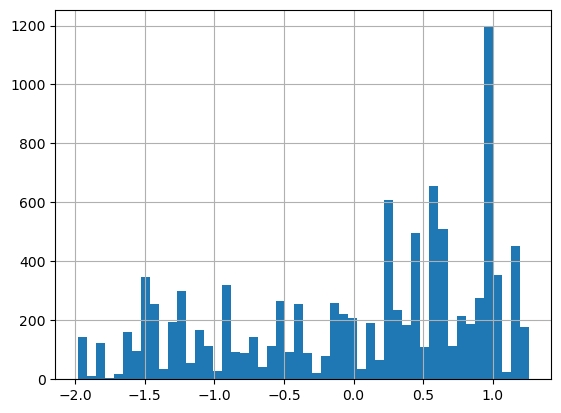

In [43]:
df_abortion_comp['theta'].hist(bins=50)

In [44]:
cuts = df_abortion_comp["theta"].quantile([0.1, 0.3, 0.7, 0.9]).to_list()
def bin_theta(x):
    if pd.isna(x): return np.nan
    if x <= cuts[0]: return "strong_anti"
    if x <= cuts[1]: return "anti"
    if x <= cuts[2]: return "pro"
    if x <= cuts[3]: return "strong_pro"
    return "strong_pro"

df_abortion_comp["abortion_attitude_5lvl"] = df_abortion_comp["theta"].apply(bin_theta)


In [46]:
df_abortion_comp.head(3)

,uasid,year_125,month_125,age_125,statereside_125,maritalstatus_125,education_125,laborstatus_125,employmenttype_125,hhincome_125,hourswork_125,hhmembernumber_125,abortion_125,year_193,month_193,age_193,statereside_193,maritalstatus_193,education_193,laborstatus_193,employmenttype_193,hhincome_193,hourswork_193,hhmembernumber_193,abortion_193,year_308,month_308,age_308,statereside_308,maritalstatus_308,education_308,laborstatus_308,employmenttype_308,hhincome_308,hourswork_308,hhmembernumber_308,abortion_308,year_621,month_621,age_621,statereside_621,maritalstatus_621,education_621,laborstatus_621,employmenttype_621,hhincome_621,hourswork_621,hhmembernumber_621,cn001f,abortion_621,year_645,month_645,age_645,statereside_645,maritalstatus_645,education_645,laborstatus_645,employmenttype_645,hhincome_645,hourswork_645,hhmembernumber_645,abortion_645,citizenus,bornus,gender,dateofbirth_year,race,h12child,h13child,h14child,h15child,h16child,h12itot,h13itot,h14itot,h15itot,h16itot,r12mstat,r13mstat,r14mstat,r15mstat,r16mstat,r12educ,r13educ,r14educ,r15educ,r16educ,rarelig,r12laborstatus,r13laborstatus,r14laborstatus,r15laborstatus,r16laborstatus,r12stateres,r13stateres,r14stateres,r15stateres,r16stateres,r12jcoccc,r13jcoccc,r14jcoccc,r15jcoccc,r12urbanicity,r13urbanicity,r14urbanicity,r15urbanicity,r16urbanicity,r12shlt,r13shlt,r14shlt,r15shlt,r16shlt,w12os001,w13os001,w14os001,w15os001,w16os001,w12os002,w13os002,w14os002,w15os002,w16os002,w12os003,w13os003,w14os003,w15os003,w16os003,w12os004,w13os004,w14os004,w15os004,w16os004,w12os005,w13os005,w14os005,w15os005,w16os005,abortion_125_available,abortion_193_available,abortion_308_available,abortion_621_available,abortion_645_available,abortion_125_ord,abortion_193_ord,abortion_308_ord,abortion_621_ord,abortion_645_ord,theta,abortion_attitude_5lvl
0,140100007,2018.0,3.0,34,Massachusetts,Married (spouse lives with me),Master's degree,Currently working,Private (for profit),"100,000 to 149,999",40,3,Neither support nor oppose,2019.0,6.0,35,Massachusetts,Married (spouse lives with me),Master's degree,Currently working,Private (for profit),"100,000 to 149,999",40,3,Would like to see Roe v. Wade overturned,2020.0,8.0,36,Massachusetts,Married (spouse lives with me),Master's degree,Currently working,Private (for profit),"100,000 to 149,999",40,3,Legal in most cases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Male,1983,White,2.0,2.0,2.0,2.0,2.0,100000.0,100500.0,132005.0,170010.0,145001.0,Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Master's degree,Master's degree,Master's degree,Master's degree,Master's degree,Catholic,Currently working,Currently working,Currently working,Currently working,Currently working,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Management Occupation,Management Occupation,Management Occupation,Management Occupation,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Excellent,Excellent,Very good,Excellent,Excellent,9.0,7.0,9.0,9.0,8.0,9.0,7.0,9.0,9.0,8.0,8.0,6.0,8.0,8.0,8.0,9.0,7.0,9.0,8.0,8.0,7.0,7.0,9.0,7.0,8.0,1,1,1,0,0,2.0,0.0,3.0,NaN,NaN,-0.369063,pro
1,140100010,2018.0,3.0,69,Massachusetts,Widowed,Master's degree,Retired,None,"7,500 to 9,999",None,0,Strongly oppose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,20789.0,NaN,NaN,NaN,NaN,Widowed,Widowed,Widowed,NaN,NaN,Master's degree,Master's degree,Master's degree,NaN,NaN,No religion,Retired,Retired,Retired,NaN,NaN,Massachusetts,Massachusetts,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,Metropolitan,Metropolitan,Metropolitan,NaN,NaN,Very good,NaN,Fair,NaN,NaN,7.0,8.0,NaN,NaN,NaN,7.0,8.0,NaN,NaN,NaN,4.0,7.0,NaN,NaN,NaN,6.0,

In [ ]:
# def format_persona_prompt(row):
    
#     intro = []
#     intro.append(
#         f"You are a {row['age_645']}-year-old {row['race'].lower()} {row['gender'].lower()} living in a {row['r16urbanicity'].lower()} area in {row['r16stateres']} in {int(row['year_645'])}. "
#         f"Your education level is {row['education_645'].lower()}, and your household income is in the range of {row['hhincome_645']}. "
#         f"You have {int(row['h16child'])} child(ren) and your marital status is {row['r16mstat']}. "
#         f"Your religion is {row['rarelig'].lower()}, and you identify as {row['r16laborstatus'].lower()} in a {row['r15jcoccc'].lower()}.\n"
#         f"When asked about your satisfaction with your life on a scale from 0 to 10, where 0 means \"not at all satisfied\" and 10 means \"completely satisfied,\" you provided the following responses:\n"
#         f"- Life satisfaction: {row['w16os001']}\n"
#         f"- Happiness: {row['w16os002']}\n"
#         f"- Satisfaction with income: {row['w16os003']}\n"
#         f"- Satisfaction with health: {row['w16os004']}\n"
#         f"- Satisfaction with job or daily activities: {row['w16os005']}.\n\n"
#         f"You have been participating in a longitudinal social survey since {row['year_125']}, "
#         f"and this is your fourth time participating.\n"
#     )

#     past_125 = []
#     past_125.append(
#         f"Your first participation was in {int(row['year_125'])} when you were {row['age_125']} years old. "
#         f"During that survey, you reported the following demographic information:\n"
#         f"- Marital status: {row['r12mstat']}\n"
#         f"- Education: {row['r12educ']}\n"
#         f"- Religion: {row['rarelig']}\n"
#         f"- Employment status: {row['r12laborstatus']}\n"
#         f"- State of residence: {row['r12stateres']}\n"
#         f"- Occupation: {row['r12jcoccc']}\n"
#         f"- Rural-urban commuter area: {row['r12urbanicity']}\n"
#         f"- Self-rated health: {row['r12shlt']}\n"
#         f"- Satisfaction with life: {row['w12os001']}\n"
#         f"- Happiness: {row['w12os002']}\n"
#         f"- Satisfaction with income: {row['w12os003']}\n"
#         f"- Satisfaction with health: {row['w12os004']}\n"
#         f"- Satisfaction with job or daily activities: {row['w12os005']}\n"
#         f"Most importantly, you were asked about your views on abortion, "
#         f"such as whether you support anti-abortion groups, and you answered: {row['abortion_125']}\n\n"
#     )

#     past_193 = []
#     past_193.append(
#         f"In your second survey participation in {int(row['year_193'])}, you were {row['age_193']} years old "
#         f"and provided the following demographic information:\n"
#         f"- Marital status: {row['r13mstat']}\n"
#         f"- Education: {row['r13educ']}\n"
#         f"- Religion: {row['rarelig']}\n"
#         f"- Employment status: {row['r13laborstatus']}\n"
#         f"- State of residence: {row['r13stateres']}\n"
#         f"- Occupation: {row['r13jcoccc']}\n"
#         f"- Rural-urban commuter area: {row['r13urbanicity']}\n"
#         f"- Self-rated health: {row['r13shlt']}\n"
#         f"- Satisfaction with life: {row['w13os001']}\n"
#         f"- Happiness: {row['w13os002']}\n"
#         f"- Satisfaction with income: {row['w13os003']}\n"
#         f"- Satisfaction with health: {row['w13os004']}\n"
#         f"- Satisfaction with job or daily activities: {row['w13os005']}\n"
#         f" Regarding abortion, when asked if you would like to see the Supreme Court overturn its Roe v. Wade decision, "
#         f"you answered: {row['abortion_193']}.\n\n"
#     )
    
#     past_308 = []
#     past_308.append(
#         f"In your third survey participation in {int(row['year_308'])}, at age {row['age_308']}, "
#         f"you provided the following demographic information:\n"
#         f"- Marital status: {row['r14mstat']}\n"
#         f"- Education: {row['r14educ']}\n"
#         f"- Religion: {row['rarelig']}\n"
#         f"- Employment status: {row['r14laborstatus']}\n"
#         f"- State of residence: {row['r14stateres']}\n"
#         f"- Occupation: {row['r14jcoccc']}\n"
#         f"- Rural-urban commuter area: {row['r14urbanicity']}\n"
#         f"- Self-rated health: {row['r14shlt']}\n"
#         f"- Satisfaction with life: {row['w14os001']}\n"
#         f"- Happiness: {row['w14os002']}\n"
#         f"- Satisfaction with income: {row['w14os003']}\n"
#         f"- Satisfaction with health: {row['w14os004']}\n"
#         f"- Satisfaction with job or daily activities: {row['w14os005']}\n"
#         f"In this survey, you were asked whether you think abortion should be legal. "
#         f"You answered: Abortion should be {row['abortion_308']}.\n\n"
#     )

#     question = []
#     question.append(
#         f"Now, you are asked about your opinions on abortion again. "
#         f"Please answer the following questions in a detailed manner, considering your past experiences and current situation. "
#         f"Your responses will help understand how your views on abortion have evolved over time."
#         f"Here are the questions you need to answer:\n"
#         f"Do you think access to abortion is important?\n"
#         f"1. Extremely important\n"
#         f"2. Very important\n"
#         f"3. Moderately important\n"
#         f"4. Slightly important\n"
#         f"5. Not at all important\n"
#     )
    
#     return "\n".join(intro + past_125 + past_193 + past_308 + question)

In [230]:
def format_persona_prompt_wv645(row):
    prompt_parts = []

    # Intro Section (assuming most people have wave 645)
    if pd.notna(row.get('age_645')):
        intro = f"""You are a {row['age_645']}-year-old {str(row.get('race', '')).lower()} {str(row.get('gender', '')).lower()} living in a {str(row.get('r16urbanicity', '')).lower()} area in {row.get('r16stateres', 'Unknown')} in {int(row['year_645'])}.
Your education level is {row.get('education_645', 'unspecified')}, and your household income is in the range of {row.get('hhincome_645', 'unknown')}.
You have {int(row['h16child']) if pd.notna(row.get('h16child')) else 'an unknown number of'} child(ren), and your marital status is {row.get('r16mstat', 'unknown')}.
Your religion is {str(row.get('rarelig', 'unknown')).lower()}, and you identify as {row.get('r16laborstatus', 'unspecified')} in a {row.get('r15jcoccc', 'unknown')}.
When asked about your satisfaction with your life on a scale from 0 to 10, where 0 means \"not at all satisfied\" and 10 means \"completely satisfied,\" you provided the following responses:
- Life satisfaction: {row.get('w16os001', 'N/A')}
- Happiness: {row.get('w16os002', 'N/A')}
- Satisfaction with income: {row.get('w16os003', 'N/A')}
- Satisfaction with health: {row.get('w16os004', 'N/A')}
- Satisfaction with job or daily activities: {row.get('w16os005', 'N/A')}

You have been participating in a longitudinal social survey since {row.get('year_125', row.get('year_193', 'year_308'))},\ 
and this is your fourth time participating.
"""
        prompt_parts.append(intro)
    
    # Past 125 (wave 125)
    if pd.notna(row.get('abortion_125')):
        part125 = f"""
Your first participation was in {int(row['year_125'])} when you were {row.get('age_125', '?')} years old. 
During that survey, you reported the following demographic information:
- Marital status: {row.get('r12mstat', 'N/A')}
- Education: {row.get('r12educ', 'N/A')}
- Religion: {row.get('rarelig', 'N/A')}
- Employment status: {row.get('r12laborstatus', 'N/A')}
- State of residence: {row.get('r12stateres', 'N/A')}
- Occupation: {row.get('r12jcoccc', 'N/A')}
- Rural-urban commuter area: {row.get('r12urbanicity', 'N/A')}
- Self-rated health: {row.get('r12shlt', 'N/A')}
- Satisfaction with life: {row.get('w12os001', 'N/A')}
- Happiness: {row.get('w12os002', 'N/A')}
- Satisfaction with income: {row.get('w12os003', 'N/A')}
- Satisfaction with health: {row.get('w12os004', 'N/A')}
- Satisfaction with job or daily activities: {row.get('w12os005', 'N/A')}

Most importantly, you were asked about your views on abortion, such as whether you support anti-abortion groups, and you answered: {row['abortion_125']}"
"""
        prompt_parts.append(part125)

    # Past 193 (wave 193)
    if pd.notna(row.get('abortion_193')):
        part193 = f"""
In your second survey participation in {int(row['year_193'])}, you were {row['age_193']} years old and provided the following demographic information:\n"
- Marital status: {row.get('r13mstat', 'N/A')}
- Education: {row.get('r13educ', 'N/A')}
- Religion: {row.get('rarelig', 'N/A')}
- Employment status: {row.get('r13laborstatus', 'N/A')}
- State of residence: {row.get('r13stateres', 'N/A')}
- Occupation: {row.get('r13jcoccc', 'N/A')}
- Rural-urban commuter area: {row.get('r13urbanicity', 'N/A')}
- Self-rated health: {row.get('r13shlt', 'N/A')}
- Satisfaction with life: {row.get('w13os001', 'N/A')}
- Happiness: {row.get('w13os002', 'N/A')}
- Satisfaction with income: {row.get('w13os003', 'N/A')}
- Satisfaction with health: {row.get('w13os004', 'N/A')}
- Satisfaction with job or daily activities: {row.get('w13os005', 'N/A')}
Regarding abortion, when asked if you would like to see the Supreme Court overturn its Roe v. Wade decision, you answered: {row.get('abortion_193')}
"""
        prompt_parts.append(part193)

    # Past 308 (wave 308)
    if pd.notna(row.get('year_308')):
        part308 = f"""
In your third survey participation in {int(row.get('year_308', 'N/A'))}, at age {row.get('age_308', 'N/A')}, "
you provided the following demographic information:
- Marital status: {row.get('r14mstat', 'N/A')}
- Education: {row.get('r14educ', 'N/A')}
- Religion: {row.get('rarelig', 'N/A')}
- Employment status: {row.get('r14laborstatus', 'N/A')}
- State of residence: {row.get('r14stateres', 'N/A')}
- Occupation: {row.get('r14jcoccc', 'N/A')}
- Rural-urban commuter area: {row.get('r14urbanicity', 'N/A')}
- Self-rated health: {row.get('r14shlt', 'N/A')}
- Satisfaction with life: {row.get('w14os001', 'N/A')}
- Happiness: {row.get('w14os002', 'N/A')}
- Satisfaction with income: {row.get('w14os003', 'N/A')}
- Satisfaction with health: {row.get('w14os004', 'N/A')}
- Satisfaction with job or daily activities: {row.get('w14os005', 'N/A')}
In this survey, you were asked whether you think abortion should be legal. "
You answered: Abortion should be {row.get('abortion_308')}.
"""
        prompt_parts.append(part308)

    # Current wave: the target
    question = f"""
Now, you are asked about your opinions on abortion again. 
Please answer the following questions in a detailed manner, considering your past experiences and current situation.
Your responses will help understand how your views on abortion have evolved over time.
Here are the questions you need to answer:

**Do you think access to abortion is important?**
1. Extremely important
2. Very important
3. Moderately important
4. Slightly important
5. Not at all important
"""
    prompt_parts.append(question)

    return "\n".join(prompt_parts).strip()


In [231]:
# Drop rows with NaN values in age_645 column
df_abortion_comp_wv645 = df_abortion_comp.dropna(subset=['age_645'])
print(df_abortion_comp_wv645.shape)

# Apply the function to each row in the DataFrame
df_abortion_comp_wv645['persona_prompt'] = df_abortion_comp_wv645.apply(format_persona_prompt_wv645, axis=1)

(2035, 142)


/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_10567/3563978733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abortion_comp_wv645['persona_prompt'] = df_abortion_comp_wv645.apply(format_persona_prompt_wv645, axis=1)


In [232]:
df_abortion_comp_wv645.head()

,uasid,year_125,month_125,age_125,statereside_125,maritalstatus_125,education_125,laborstatus_125,employmenttype_125,hhincome_125,hourswork_125,hhmembernumber_125,abortion_125,year_193,month_193,age_193,statereside_193,maritalstatus_193,education_193,laborstatus_193,employmenttype_193,hhincome_193,hourswork_193,hhmembernumber_193,abortion_193,year_308,month_308,age_308,statereside_308,maritalstatus_308,education_308,laborstatus_308,employmenttype_308,hhincome_308,hourswork_308,hhmembernumber_308,abortion_308,year_621,month_621,age_621,statereside_621,maritalstatus_621,education_621,laborstatus_621,employmenttype_621,hhincome_621,hourswork_621,hhmembernumber_621,cn001f,abortion_621,year_645,month_645,age_645,statereside_645,maritalstatus_645,education_645,laborstatus_645,employmenttype_645,hhincome_645,hourswork_645,hhmembernumber_645,abortion_645,citizenus,bornus,gender,dateofbirth_year,race,h12child,h13child,h14child,h15child,h16child,h12itot,h13itot,h14itot,h15itot,h16itot,r12mstat,r13mstat,r14mstat,r15mstat,r16mstat,r12educ,r13educ,r14educ,r15educ,r16educ,rarelig,r12laborstatus,r13laborstatus,r14laborstatus,r15laborstatus,r16laborstatus,r12stateres,r13stateres,r14stateres,r15stateres,r16stateres,r12jcoccc,r13jcoccc,r14jcoccc,r15jcoccc,r12urbanicity,r13urbanicity,r14urbanicity,r15urbanicity,r16urbanicity,r12shlt,r13shlt,r14shlt,r15shlt,r16shlt,w12os001,w13os001,w14os001,w15os001,w16os001,w12os002,w13os002,w14os002,w15os002,w16os002,w12os003,w13os003,w14os003,w15os003,w16os003,w12os004,w13os004,w14os004,w15os004,w16os004,w12os005,w13os005,w14os005,w15os005,w16os005,abortion_125_available,abortion_193_available,abortion_308_available,abortion_621_available,abortion_645_available,persona_prompt
20,140100156,2018.0,3.0,29,Massachusetts,Married (spouse lives with me),Bachelor's degree,Currently working,Private (for profit),"150,000 or more",24,3,Strongly support,2019.0,6.0,30,Massachusetts,Married (spouse lives with me),Bachelor's degree,Currently working,Private (for profit),"150,000 or more",24,3,Would not like to see Roe v. Wade overturned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,7.0,35,Hawaii,Married (spouse lives with me),Bachelor's degree,Other Labor Force Status,None,"60,000 to 74,999",None,3,Majority agreement,Agree,2024.0,10.0,36,Hawaii,Married (spouse lives with me),Bachelor's degree,Other Labor Force Status,None,"60,000 to 74,999",None,3,Extremely important,Yes,Yes,Female,1988,Asian,0.0,0.0,2.0,2.0,2.0,115000.0,86600.0,102000.0,65000.0,80000.0,Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Married (Spouse lives with you),Bachelor's degree,Bachelor's degree,Bachelor's degree,Bachelor's degree,Bachelor's degree,Other religion,Currently working,Currently working,Other Labor Force Status,Other Labor Force Status,Other Labor Force Status,Massachusetts,Massachusetts,Massachusetts,Hawaii,Hawaii,Personal Care and Service Occupation,NaN,NaN,NaN,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Excellent,Excellent,Excellent,Very good,Very good,9.0,10.0,8.0,9.0,8.0,9.0,10.0,10.0,10.0,8.0,6.0,4.0,0.0,8.0,6.0,10.0,10.0,7.0,8.0,8.0,6.0,8.0,7.0,8.0,6.0,1,1,0,1,1,You are a 36-year-old asian female living in a...
23,140100175,2018.0,3.0,56,Massachusetts,Married (spouse lives with me),Some college-no degree,Currently working,Private (for profit),"50,000 to 59,999",55,1,Strongly oppose,2019.0,6.0,58,Massachusetts,Married (spouse lives with me),Some college-no degree,Currently working,Private (for profit),"60,000 to 74,999",55,1,Would not like to see Roe v. Wade overturned,2020.0,8.0,59,Massachusetts,Married (spouse lives with me),Some college-no degree,Unemployed - looking,None,"40,000 to 49,999",None,1,Legal in most cases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,11.0,63,Massachusetts,Married (spouse lives with me),Some college-no degree,Mixed,None,"40,000 to 49,999",None,1,Extremely important,Yes,Yes,Male,1961,

In [233]:
print(df_abortion_comp_wv645['persona_prompt'].iloc[0])

You are a 36-year-old asian female living in a metropolitan area in Hawaii in 2024.
Your education level is Bachelor's degree, and your household income is in the range of 60,000 to 74,999.
You have 2 child(ren), and your marital status is Married (Spouse lives with you).
Your religion is other religion, and you identify as Other Labor Force Status in a nan.
When asked about your satisfaction with your life on a scale from 0 to 10, where 0 means "not at all satisfied" and 10 means "completely satisfied," you provided the following responses:
- Life satisfaction: 8.0
- Happiness: 8.0
- Satisfaction with income: 6.0
- Satisfaction with health: 8.0
- Satisfaction with job or daily activities: 6.0

You have been participating in a longitudinal social survey since 2018.0,\ 
and this is your fourth time participating.


Your first participation was in 2018 when you were 29 years old. 
During that survey, you reported the following demographic information:
- Marital status: Married (Spouse li

In [ ]:
# Save the merged dataset to a CSV file
# df_abortion_comp_wv645.to_csv("/Users/wooyongjung/WJ_Projects/C2P_Project/Data/UAS/df_abortion_comp_wv645.csv", index=False)

### Model evaluation

In [238]:
from huggingface_hub import notebook_login
notebook_login()

In [241]:
import bitsandbytes as bnb
print(bnb.__version__)

'NoneType' object has no attribute 'cadam32bit_grad_fp32'
0.42.0


/Users/wooyongjung/miniconda3/envs/llms/lib/python3.11/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


In [240]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline, BitsAndBytesConfig
import torch

model_id = 'yilmajung/gss-mistral-lora'
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,    
    bnb_4bit_compute_dtype=torch.float16
)
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map='auto',
    trust_remote_code=True
)

ImportError: Using `bitsandbytes` 4-bit quantization requires the latest version of bitsandbytes: `pip install -U bitsandbytes`

In [ ]:
# Consider how to make the questions and options with consistent formatting
# Apply the function to each row in the DataFrame